Load MG1655 genbank and generate a Karyotype

In [1]:
from pyrcos import utils
from Bio import SeqIO

In [2]:
record = SeqIO.read("../data/MG1655.gb", "gb")
karyotype = utils.seq_records_to_karyotype([record])

In [3]:
print(karyotype)

chr - NC_000913.3 NC_000913 1 4641652 white


Load RegulonDB Transcription network

In [4]:
from pyrcos.datasets import regulatory_network

In [5]:
interactions = regulatory_network.parse_regulondb("../data/GeneProductSet.txt", 
                                                  "../data/TFSet.txt",
                                                  "../data/network_tf_gene.txt")

ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'SROD'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'SROD'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'EFEU_2'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'SGRT'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'YEGZ'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'FNRS'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'SROD'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'SROC'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'ILVG_1'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'ILVG_1'
ERROR:/Users/joao/PycharmProjects/pyrcos/pyrcos/datasets/regulatory_network.pyc:'ILVG_2'
ERROR:/Users/joao/PycharmProjects/p

In [6]:
positions = {f.qualifiers["locus_tag"][0]: [f.location.start, f.location.end, record.id] 
             for f in record.features if f.type == "gene"}
interactions_file = regulatory_network.convert_interactions_to_links(interactions, positions)
interactions_file.flush()

Create circos objects

In [7]:
from pyrcos.objects import Circos, Link

In [8]:
link = Link(file=interactions_file, radius="0.98r")
circos = Circos(karyotype, links=link, circos_path="/Users/joao/Documents/circos-0.67-7/")

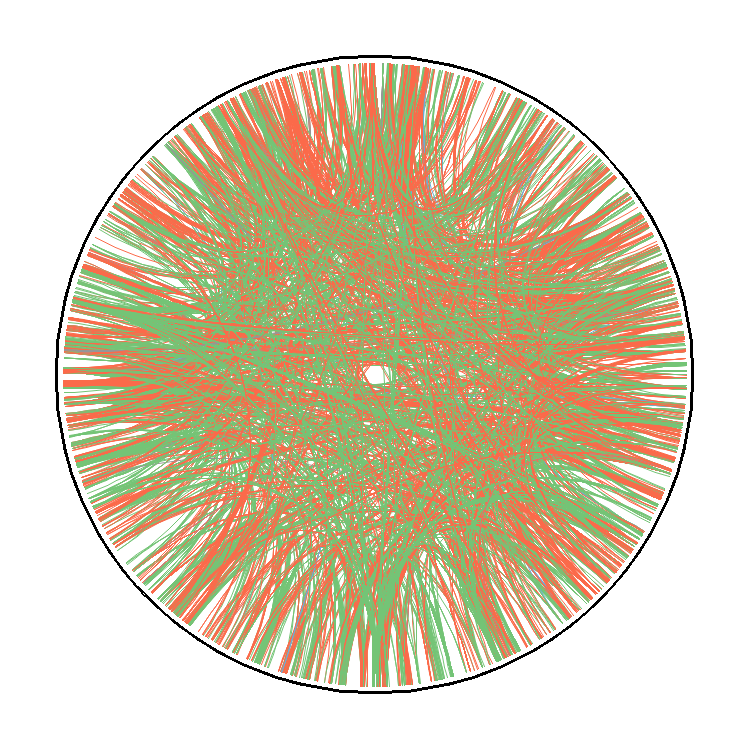

''

In [9]:
circos